# Bike-sharing

![](https://images.unsplash.com/photo-1533641568252-76ce0951d5b4?ixlib=rb-1.2.1&q=80&fm=jpg&crop=entropy&cs=tinysrgb&w=1080&fit=max&ixid=eyJhcHBfaWQiOjEyMDd9)
Picture by [Fernando Meloni](https://unsplash.com/@f_meloni)

We will use the Bike Sharing Demand dataset from Kaggle: https://www.kaggle.com/c/bike-sharing-demand.

# I. Imports and loading the data

In [1]:
import os 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from vivadata.datasets.common import get_path_for_dataset

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Create a path to the data
path = os.path.join('..', 'input')
df_train = pd.read_csv(os.path.join(path, 'train.csv'))
df_train.shape

(10886, 12)

In [3]:
# Checking the data
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# Display the informations about the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [5]:
# Checking some statistics informations about the data
df_train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# II. EDA

## II.1. Analysis of the given columns

Let's visualize the data to understand it better. 

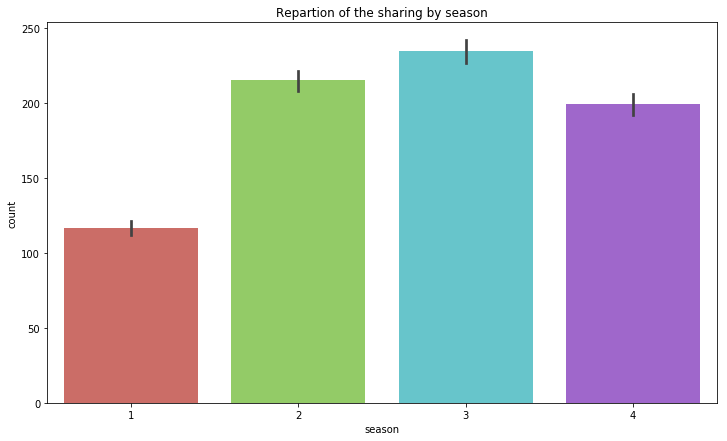

In [6]:
ax, fig = plt.subplots(figsize=(12, 7))
sns.barplot(y='count', x='season', data=df_train, palette='hls')
plt.title('Repartion of the sharing by season');

_The season plays on the use of shared bike. One thing is interrogating, the season 1 is indicated as 'spring' in the documentation but correspond to january in the dataset. Watching the graph it seems quite intuitive that it would be winter, the less attrative season to do bike. But this point needs to be investigate to be sure of what 1 represents._ 

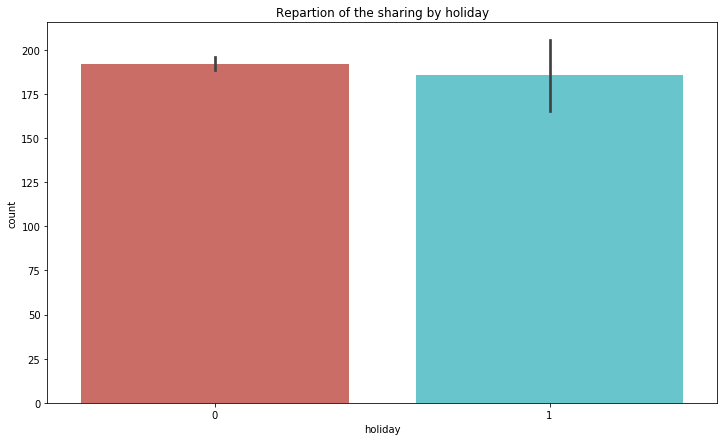

In [7]:
ax, fig = plt.subplots(figsize=(12, 7))
sns.barplot(y='count', x='holiday', data=df_train, palette='hls')
plt.title('Repartion of the sharing by holiday');

_The holidays don't seems to affect the use of the shared bike. We could see, by crossing this colum with an hour columns, if the hour of use are the same during the 2 periods._

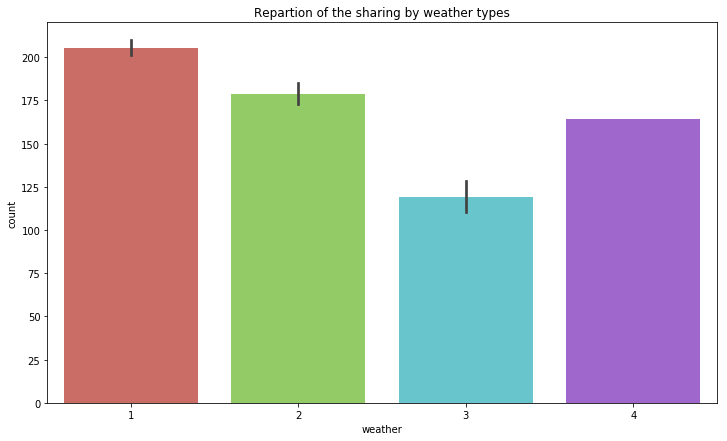

In [8]:
ax, fig = plt.subplots(figsize=(12, 7))
sns.barplot(y='count', x='weather', data=df_train, palette='hls')
plt.title('Repartion of the sharing by weather types');

_1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog_

_There is more use when the weather is good, which is quite intuitive. The 4 nevertheless is quite strange, it's the worst weather so we could expect less people than when it's a little bad._

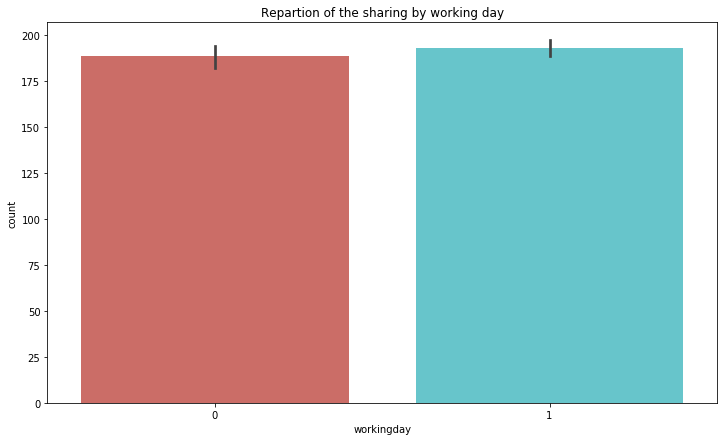

In [9]:
ax, fig = plt.subplots(figsize=(12, 7))
sns.barplot(y='count', x='workingday', data=df_train, palette='hls')
plt.title('Repartion of the sharing by working day');

_As the holiday graph we see that the number of renting stay quite similar for working day or not. It could be interesting to cross it with an hour count to see if it fluctuates._

## II.2. Features enginering to create new columns

In [10]:
# TConvert datetime column to a datetime
df_train['datetime'] = pd.to_datetime(df_train['datetime'])
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [11]:
# Create a day of week column: dow
df_train['dow'] = df_train['datetime'].dt.dayofweek
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dow
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,5


In [12]:
# Create a month column: month
df_train['month'] = df_train['datetime'].dt.month
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dow,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,5,1


In [13]:
# Create a column with the week number: week
df_train['week'] = df_train['datetime'].dt.week
df_train.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dow,month,week
878,2011-03-01 01:00:00,1,0,1,1,10.66,11.365,70,23.9994,0,3,3,1,3,9
9491,2012-09-18 20:00:00,3,0,1,2,24.60,27.275,88,12.9980,19,271,290,1,9,38
180,2011-01-08 19:00:00,1,0,0,1,5.74,6.060,36,16.9979,4,26,30,5,1,1
10549,2012-12-05 23:00:00,4,0,1,1,12.30,13.635,49,26.0027,5,69,74,2,12,49
3770,2011-09-08 01:00:00,3,0,1,3,25.42,27.275,94,7.0015,0,4,4,3,9,36
2375,2011-06-06 21:00:00,2,0,1,1,27.06,31.060,57,6.0032,29,160,189,0,6,23
4776,2011-11-12 02:00:00,4,0,0,1,9.84,12.880,65,6.0032,7,39,46,5,11,45
9733,2012-10-09 22:00:00,4,0,1,2,19.68,23.485,77,6.0032,7,155,162,1,10,41
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,5,1,52
8425,2012-07-12 10:00:00,3,0,1,1,30.34,33.335,48,11.0014,69,145,214,3,7,28


In [14]:
# Create a column with the hour: hour
df_train['hour'] = df_train['datetime'].dt.hour
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dow,month,week,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,5,1,52,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,5,1,52,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,5,1,52,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,5,1,52,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,5,1,52,4


## II.3. Visualize the new data

### II.3-A. Univariable analysis

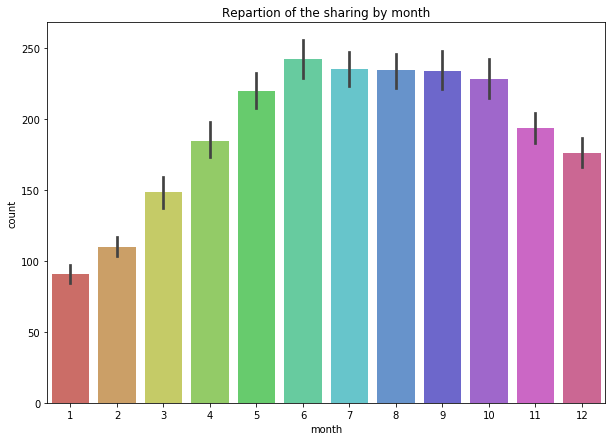

In [15]:
ax, fig = plt.subplots(figsize=(10, 7))
sns.barplot(y='count', x='month', data=df_train, palette='hls')
plt.title('Repartion of the sharing by month');

_The repartition of the renting by month quite follow the evolution of good weather. THere is a surprising and drastic decrease in january and february. Even compare to december, which should have a quite similar weather. **Why?**_

_This drop is quite similar to the gap between the season 1 and the others. It seems to indicate that season 1 correspond to winter (which was suggested by the fact that data from january are labelled with '1') and the documentation was wrong._

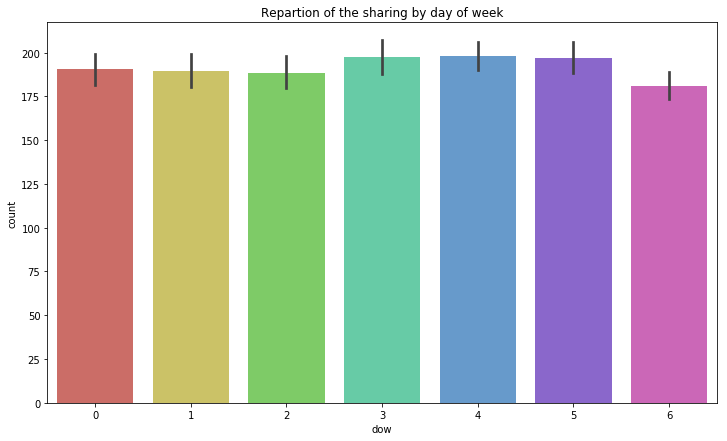

In [16]:
ax, fig = plt.subplots(figsize=(12, 7))
sns.barplot(y='count', x='dow', data=df_train, palette='hls')
plt.title('Repartion of the sharing by day of week');

_We see small fluctuation of the use of bike during the week. If there is quite less on sunday, saturday are almost equal to working day. So, as we saw previously, the working parameters doesn't have an important influence on the use._ 

### II.3-A. Multivariable analysis

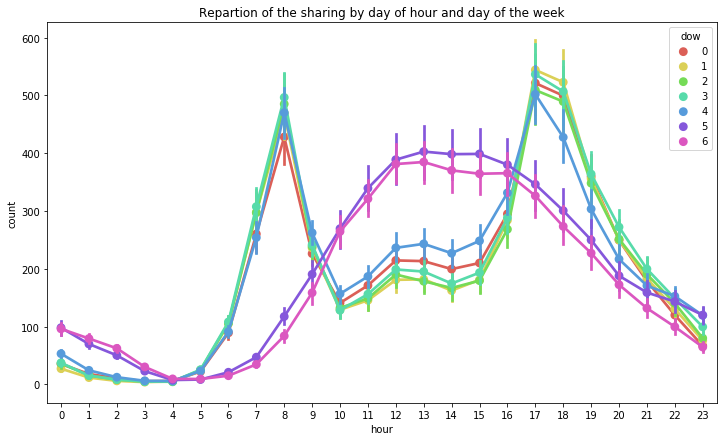

In [17]:
ax, fig = plt.subplots(figsize=(12, 7))
sns.pointplot(y='count', x='hour', hue='dow', data=df_train, palette='hls')
plt.title('Repartion of the sharing by day of hour and day of the week');

_The ploting of the use by hour by day show that, if the count is similar for working day and weekend, the hours of use are nearly reversed._ 

_The use of bike is different between the working day and weekend but the total count stay stable._

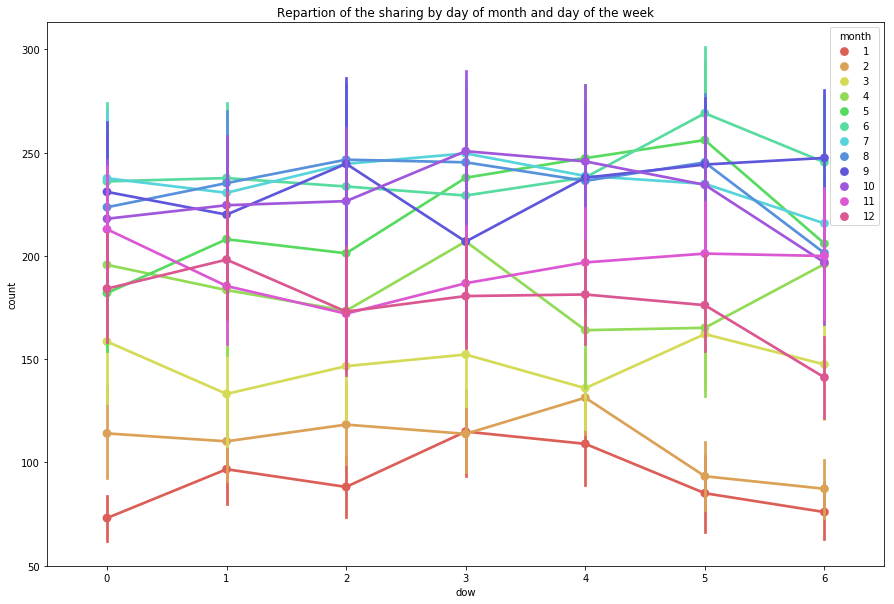

In [18]:
ax, fig = plt.subplots(figsize=(15, 10))
sns.pointplot(y='count', x='dow', hue='month', data=df_train, palette='hls')
plt.title('Repartion of the sharing by day of month and day of the week');

_The use of bike in the week change according to the month. We could see the 2 way below lines for january & february, showing the same fall that on the month graph._

_But the different lines are quite unsimilar according to the month._

_Sadly the huge confidence interval tend to show this results are not really liable._

# III. Machine learning

## III.1. Chosing and dividing your data

In [19]:
# Define a y and X to work with by selecting the columns you're interested in. 
y_raw = df_train.loc[:, 'count']
X_raw = df_train.drop(['count', 'datetime', 'registered', 'casual'], axis=1)
y_raw.shape, X_raw.shape

((10886,), (10886, 12))

In [20]:
# Import train_test_split to split your data.
from sklearn.model_selection import train_test_split

In [21]:
# Split the data and verify its shape.
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8164, 12), (8164,), (2722, 12), (2722,))

In [22]:
# Display X_train
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,dow,month,week,hour
1210,1,0,1,1,9.84,11.365,75,12.9980,1,3,11,5
972,1,0,1,2,12.30,15.150,75,11.0014,4,3,9,23
8262,3,0,1,1,37.72,41.665,33,23.9994,3,7,27,15
7717,2,0,1,3,24.60,27.275,88,8.9981,4,6,22,22
1643,2,0,1,1,18.86,22.725,51,8.9981,3,4,15,9


In [23]:
# Verify the absence of null values
X_train.isna().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dow           0
month         0
week          0
hour          0
dtype: int64

In [24]:
# Display y_train
y_train[:5]

1210     11
972      46
8262    254
7717     23
1643    170
Name: count, dtype: int64

In [25]:
# Verify the absence of null values. 
y_train.isna().sum()

0

## III.2. Create a model for machine learning

### III.2-A. Linear regression (on the data we split)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import KFold

In [45]:
# Create a linear regression model and fit it on X_train, y_train.
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
# Predict on X_test.
y_pred = lr.predict(X_test)
y_pred

array([159.50040494, 202.28847395, -41.58865025, ..., 332.12190501,
       130.88447959, 135.82616434])

In [33]:
# Compute the mean squarred error.
mean_squared_error(y_test, y_pred)

22675.80169174815

In [55]:
X_train.max()

season          4.0000
holiday         1.0000
workingday      1.0000
weather         4.0000
temp           41.0000
atemp          44.6950
humidity      100.0000
windspeed      56.9969
dow             6.0000
month          12.0000
week           52.0000
hour           23.0000
dtype: float64

In [54]:
y_train.max()

977

### III.2-B. Random Forest (on the kaggle test sample)

We need to transform the test sample supplied by kaggle in order to predict on it. 

In [57]:
# Import of the data.
df_test = pd.read_csv(os.path.join('..', 'input', 'test.csv'))
df_test.shape

(6493, 9)

In [60]:
# Checking the data.
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,week,dow,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,3,3,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,3,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,3,3,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,3,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,3,3,4


In [59]:
# Doing the same processing than on the train dataframe.
df_test['datetime'] = pd.to_datetime(df_test['datetime'])
df_test['month'] = df_test['datetime'].dt.month
df_test['week'] = df_test['datetime'].dt.week
df_test['dow'] = df_test['datetime'].dt.dayofweek
df_test['hour'] = df_test['datetime'].dt.hour
df_test_clear = df_test.drop(['datetime'], axis=1)
df_test_clear.sample(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,week,dow,hour
3979,2,0,1,1,21.32,25.000,39,23.9994,3,13,3,15
2468,4,0,0,1,16.40,20.455,76,0.0000,10,42,6,9
5217,3,0,1,1,25.42,28.790,83,0.0000,8,34,3,5
929,2,0,1,3,27.06,30.305,83,26.0027,4,17,2,17
5666,4,0,0,1,20.50,24.240,63,7.0015,9,39,5,22
1025,2,0,1,1,25.42,31.060,53,0.0000,5,20,4,17
5431,3,0,1,1,18.04,21.970,77,0.0000,9,38,3,3
296,1,1,0,3,11.48,12.120,75,27.9993,2,8,0,16
1280,2,0,1,1,31.98,37.120,59,8.9981,5,22,1,8
1852,3,0,0,2,24.60,27.275,88,0.0000,8,33,5,4


In [61]:
X_test_2 = df_test.drop(['datetime'], axis=1)
X_test_2.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,week,dow,hour
0,1,0,1,1,10.66,11.365,56,26.0027,1,3,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,1,3,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,1,3,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,1,3,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,1,3,3,4


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [63]:
# Create a RandomForestRegressor model
rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10, max_features='auto', 
max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, 
min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1, oob_score=False, 
random_state=None, verbose=0, warm_start=False)

In [64]:
# Fit the model on X_train and y_train
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [65]:
# Predict on X_test and register the log of the prediction
log_pred = rf.predict(X_test_2)
y_pred = np.expm1(log_pred)
y_pred[:5]

array([1.66508778e+06, 1.63300287e+02, 2.77605039e+01, 1.14319337e+01,
       1.02508638e+01])

_Submit to kaggle, this model scores 0.59418 (evaluated with Root Mean Squared Logarithmic Error)_